In [3]:
import cv2
import matplotlib.pyplot as plt
# load the image and convert to grayscale
inpimage = cv2.imread("/content/lena color.png")
inpimage = cv2.cvtColor(inpimage, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(inpimage, cv2.COLOR_BGR2GRAY)
#Denoising image before edge detection
denoiseimg = cv2.GaussianBlur(gray,(3,3),0)
#Apply Sobel operator on x and y dimensions
sobelx = cv2.Sobel(denoiseimg,cv2.CV_64F,1,0,ksize=5) # x
sobely = cv2.Sobel(denoiseimg,cv2.CV_64F,0,1,ksize=5) # y
sobel = sobelx + sobely
laplacian = cv2.Laplacian(denoiseimg,cv2.CV_64F)

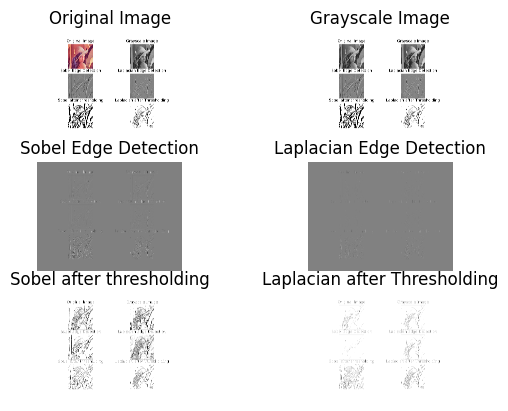

In [4]:
#Apply Inverse Thresholding to Sobel Edge Detection
ret,thresh1 = cv2.threshold(sobel,220,255, cv2.THRESH_BINARY_INV)
#Apply Inverse Thresholding to Laplacian Edge Detection
ret,thresh2 = cv2.threshold(laplacian,10,255, cv2.THRESH_BINARY_INV)
plt.subplot(321),plt.imshow(inpimage),plt.title('Original Image'), plt.axis('off')
plt.subplot(322),plt.imshow(gray,cmap='gray'),plt.title('Grayscale Image'), plt.axis('off')
plt.subplot(323),plt.imshow(sobel,cmap='gray'),plt.title('Sobel Edge Detection'), plt.axis('off')
plt.subplot(324),plt.imshow(laplacian,cmap='gray'),plt.title('Laplacian Edge Detection'),
plt.axis('off')
plt.subplot(325),plt.imshow(thresh1,cmap='gray'),plt.title('Sobel after thresholding'),
plt.axis('off')
plt.subplot(326),plt.imshow(thresh2,cmap='gray'),plt.title('Laplacian after Thresholding'),
plt.axis('off')
plt.savefig("/content/lena color.png", format="png",dpi=1200)
plt.show()